In [ ]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# ARIMA (시계열 예측)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 저장
import pickle

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 시간 정보가 포함된 데이터 살펴보기 (시계열 데이터)

In [ ]:
# 수집처 : blockchain.com
bitcoin_df = pd.read_csv('data/market-price.csv')
bitcoin_df.head()

,datetime,market-price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000


In [ ]:
# 컬럼 이름 변경
bitcoin_df.columns = ['day', 'price']
bitcoin_df.head()

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000


In [ ]:
# 데이터 프레임 정보 확인
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


#### day 컬럼의 값을 날짜 타입으로 변경한다.
- pd.to_datetime()

In [ ]:
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     365 non-null    datetime64[ns]
 1   price   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


#### 시각화를 위해 날짜를 인덱스로 설정한다.

In [ ]:
bitcoin_df.set_index('day', inplace=True)
bitcoin_df

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000
...,...
2018-08-22,6575.229167
2018-08-23,6434.881667
2018-08-24,6543.645714


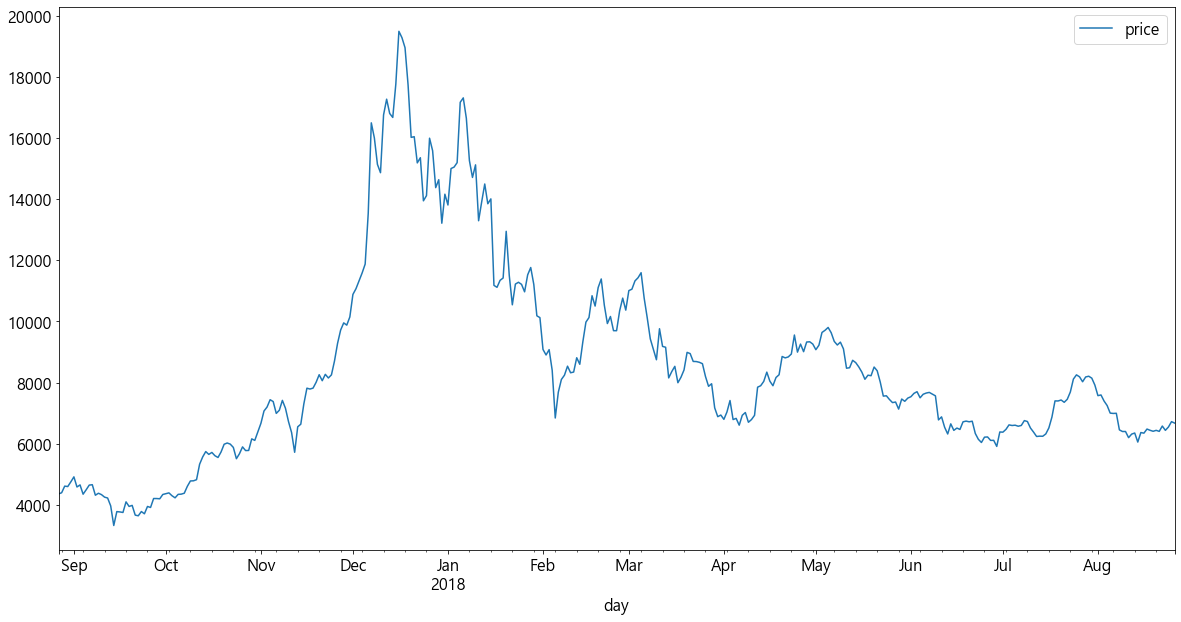

In [ ]:
# 선 그래프로 그린다.
# 인덱스가 x 축, 값이 y축이 된다.
bitcoin_df.plot()
plt.show()

 # ARIMA
 - ARIMA는 Autoregressive Integrated Moving Average의 약자로, Autoregressive는 자기회귀모형을 의미하고, Moving Average는 이동평균모형을 의미
 - ARIMA는 자기회귀와 이동평균을 둘 다 고려하는 모형인데, ARMA와 ARIMA의 차이점은 ARIMA의 경우 시계열의 비정상성(Non-stationary)을 설명하기 위해 관측치간의 차분(Diffrance)을 사용한다는 차이점이 있다.
- R: 자기회귀(Autoregression). 이전 관측값의 오차항이 이후 관측값에 영향을 주는 모형이다. 아래 식은 제일 기본적인 AR(1) 식으로, theta는 자기상관계수, epsilon은 white noise이다. Time lag은 1이 될수도 있고 그 이상이 될 수도 있다.
eq_ar1
- AR(자기상관) : 이전의 값이 이후의 값에 영향을 미치고 있는 상황
- I: Intgrated. 누적을 의미하는 것으로, 차분을 이용하는 시계열모형들에 붙이는 표현이라고 생각하면 편하다.
- MA(이동평균) : 랜덤 변수의 평균값이 지속적으로 증가하거나 감소하는 추세

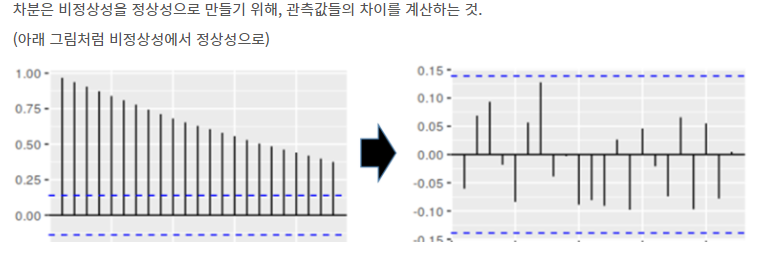

### ARIMA(p, d, q)
- AR(p) = ARIMA(p, 0, 0)
- MA(q) = ARIMA(0, 0, q)
- ARMA(p, q) = ARIMA(p, 0, q)

- order=c(p,d,q)

In [ ]:
model = ARIMA(bitcoin_df['price'].values, order=(2, 1, 2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.553
Method:                       css-mle   S.D. of innovations            512.415
Date:                Mon, 17 May 2021   AIC                           5587.107
Time:                        10:12:15   BIC                           5610.490
Sample:                             1   HQIC                          5596.400
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3182     27.794      0.227      0.820     -48.157      60.794
ar.L1.D.y     -0.3790      1.829     -0.207      0.836      -3.964       3.206
ar.L2.D.y      0.1585      1.192      0.133      0.894      -2.178       2.495
ma.L1.D.y      0.4571      1.825      0.250      0.802      -3.119       4.034
ma.L2.D.y     -0.1940      1.339     -0.145      0.885      -2.819       2.431
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5864           +0.0000j            1.5864            0.5000
AR.2            3.9780           +0.0000j            3.9780            0.0000
MA.1           -1.3797           +0.0000j            1.3797            0.5000
MA.2            3.7355           +0.0000j            3.7355            0.0000
-----------------------------------------------------------------------------
"""

### 모델 성능과 에측 결과 시각화

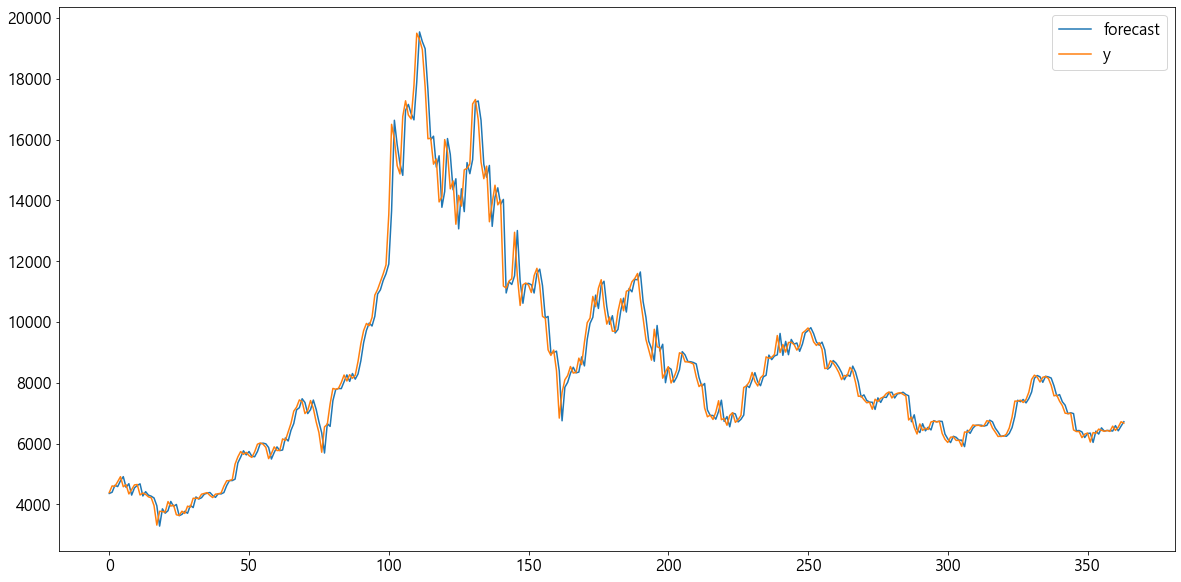

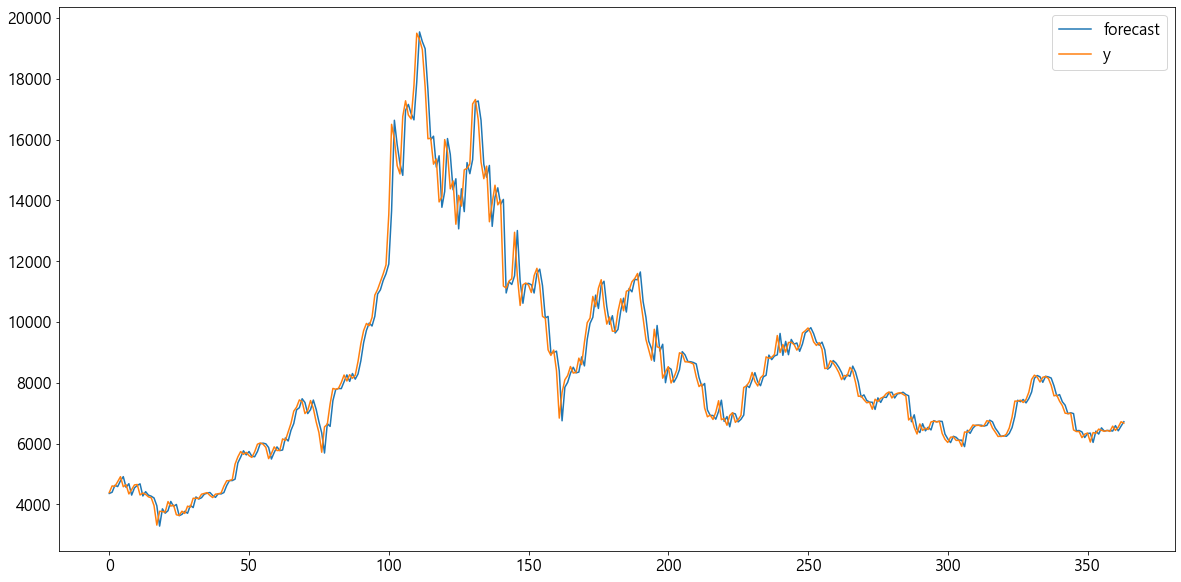

In [ ]:
# 학습한 데이터의 값을 파란색, 예측한 결과를 주황색으로 그래프를 그린다.
model_fit.plot_predict()

### 데이터를 예측한다.
- model_fit.forecast()

In [ ]:
# 향후 5일 후의 값을 예측한다.
forecast_data = model_fit.forecast(steps=5)
forecast_data[0]

array([6676.88364426, 6684.97932695, 6690.1946469 , 6697.21241755,
       6703.09069388])

In [ ]:
# 5일치 수집된 데이터를 불러온다.
bitcoin_test_df = pd.read_csv('data/market-price-test.csv')
bitcoin_test_df.columns = ['day', 'price']
bitcoin_test_df

,day,price
0,2018-08-27 00:00:00,6719.266154
1,2018-08-28 00:00:00,7000.040000
2,2018-08-29 00:00:00,7054.276429
3,2018-08-30 00:00:00,6932.662500
4,2018-08-31 00:00:00,6981.946154


In [ ]:
# 예측 결과를 가져온다.
pred_y = forecast_data[0].tolist()

# 진짜 결과를 추출
test_y = bitcoin_test_df['price'].values

print(pred_y)
print(test_y)

[6676.88364425731, 6684.979326948958, 6690.194646896189, 6697.212417547599, 6703.090693880415]
[6719.26615385 7000.04       7054.27642857 6932.6625     6981.94615385]


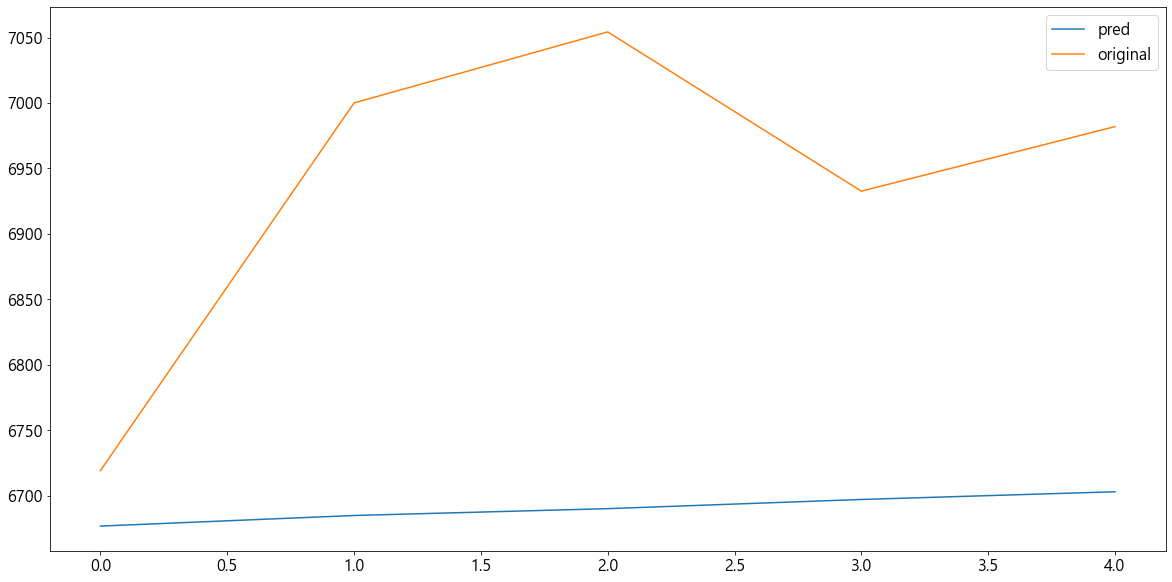

In [ ]:
plt.plot(pred_y, label='pred')
plt.plot(test_y, label='original')

plt.legend()
plt.show()

# facebook Prophet 사용

- conda install -c conda-forge fbprophet
- pip uninstall fbprophet
- pip install fbprophet

In [ ]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [ ]:
bitcoin_df = pd.read_csv('data/market-price.csv')
# fbprophet 사용시에는 날짜 값은 ds, 값은 y 라는 컬럼으로
# 지정해야 한다.
bitcoin_df.columns = ['ds', 'y']
bitcoin_df.head()

,ds,y
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000


### fbprophet 생성 및 학습
- seasonality_mode  : multiplicative 를 넣어주면 다양한 기준으로 분석을 하게 된다.
- yearly_seasonality, weekly_seasonality, daily_seasonality 를 True로 주면 년간, 주간, 일간 트랜드를 분석하여 패턴을 학습한다.
- changepoint_prior_scale : 각 트랜드 기간 내에서 세밀화하는 기준

In [ ]:
prophet = Prophet(seasonality_mode='multiplicative',
                 yearly_seasonality=True,
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

### 모델로 부터 예측 기간을 정의하고 결과를 도출한다.
- 5일을 내다보며 예측한다.
- periods : 내다볼 기간의 수
- freq : 기준(d : 일, m : 월, y : 년)

In [ ]:
# 5일을 내다보며 예측한다.
# periods : 내다볼 기간의 수
# freq : 기준(d : 일, m : 월, y : 년)
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2017-08-27,473.569120,3768.189967,5134.440552,473.569120,473.569120,9.563964,9.563964,9.563964,8.356854,...,-0.038472,-0.038472,-0.038472,-1.168637,-1.168637,-1.168637,0.0,0.0,0.0,4431.117317
1,2017-08-28,476.933144,3836.269820,5172.951735,476.933144,476.933144,9.563964,9.563964,9.563964,8.436224,...,-0.006602,-0.006602,-0.006602,-1.121138,-1.121138,-1.121138,0.0,0.0,0.0,4500.447825
2,2017-08-29,480.297167,3932.164986,5195.793933,480.297167,480.297167,9.563964,9.563964,9.563964,8.494301,...,0.019974,0.019974,0.019974,-1.089637,-1.089637,-1.089637,0.0,0.0,0.0,4560.085805
3,2017-08-30,483.661190,3887.591557,5227.906386,483.661190,483.661190,9.563964,9.563964,9.563964,8.440425,...,-0.046634,-0.046634,-0.046634,-1.076905,-1.076905,-1.076905,0.0,0.0,0.0,4565.966993
4,2017-08-31,487.025213,3919.999316,5242.810122,487.025213,487.025213,9.563964,9.563964,9.563964,8.461194,...,-0.017649,-0.017649,-0.017649,-1.085122,-1.085122,-1.085122,0.0,0.0,0.0,4607.839822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2018-08-27,738.543896,6287.943037,7565.270145,738.543896,738.543896,9.563964,9.563964,9.563964,8.374726,...,-0.006602,-0.006602,-0.006602,-1.182636,-1.182636,-1.182636,0.0,0.0,0.0,6923.647020
366,2018-08-28,742.612648,6353.752153,7689.044989,742.612648,742.612648,9.563964,9.563964,9.563964,8.452304,...,0.019974,0.019974,0.019974,-1.131634,-1.131634,-1.131634,0.0,0.0,0.0,7019.400574
367,2018-08-29,746.681400,6368.468842,7730.423970,745.235311,746.681400,9.563964,9.563964,9.563964,8.421478,...,-0.046634,-0.046634,-0.046634,-1.095851,-1.095851,-1.095851,0.0,0.0,0.0,7034.842537
368,2018-08-30,750.750152,6309.811338,7836.661996,743.433466,754.956955,9.563964,9.563964,9.563964,8.468117,...,-0.017649,-0.017649,-0.017649,-1.078198,-1.078198,-1.078198,0.0,0.0,0.0,7108.190099


In [ ]:
# 예측 결과를 추출한다.
forecast_data[['ds', 'yhat']]

,ds,yhat
0,2017-08-27,4431.117317
1,2017-08-28,4500.447825
2,2017-08-29,4560.085805
3,2017-08-30,4565.966993
4,2017-08-31,4607.839822
...,...,...
365,2018-08-27,6923.647020
366,2018-08-28,7019.400574
367,2018-08-29,7034.842537
368,2018-08-30,7108.190099


### 가격 예측

In [ ]:
bitcoin_test_df = pd.read_csv('data/market-price-test.csv')
bitcoin_test_df.columns = ['ds', 'y']
bitcoin_test_df

,ds,y
0,2018-08-27 00:00:00,6719.266154
1,2018-08-28 00:00:00,7000.040000
2,2018-08-29 00:00:00,7054.276429
3,2018-08-30 00:00:00,6932.662500
4,2018-08-31 00:00:00,6981.946154


In [ ]:
# 예측 결과의 마지막 5개가 새롭게 추가된 5일치 데이터이다.
pred_y = forecast_data['yhat'].values[-5:]
# 진짜 결과
test_y = bitcoin_test_df['y'].values

print(pred_y)
print(test_y)

[6923.64702007 7019.40057427 7034.84253693 7108.19009905 7184.99077545]
[6719.26615385 7000.04       7054.27642857 6932.6625     6981.94615385]


In [ ]:
plt.plot(test_y, label='original')
plt.plot(pred_y, label='prediction')
plt.legend()
plt.show()